In [12]:
## Library Imports
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imblearn as imbl

## Custom libraries
import index_helpers as ih
import data_transformations as dtrans

### Import Data

Examining the fine segmentation

In [21]:
df = ih.read_and_merge_data()
df = ih.index_df_by_person(df)

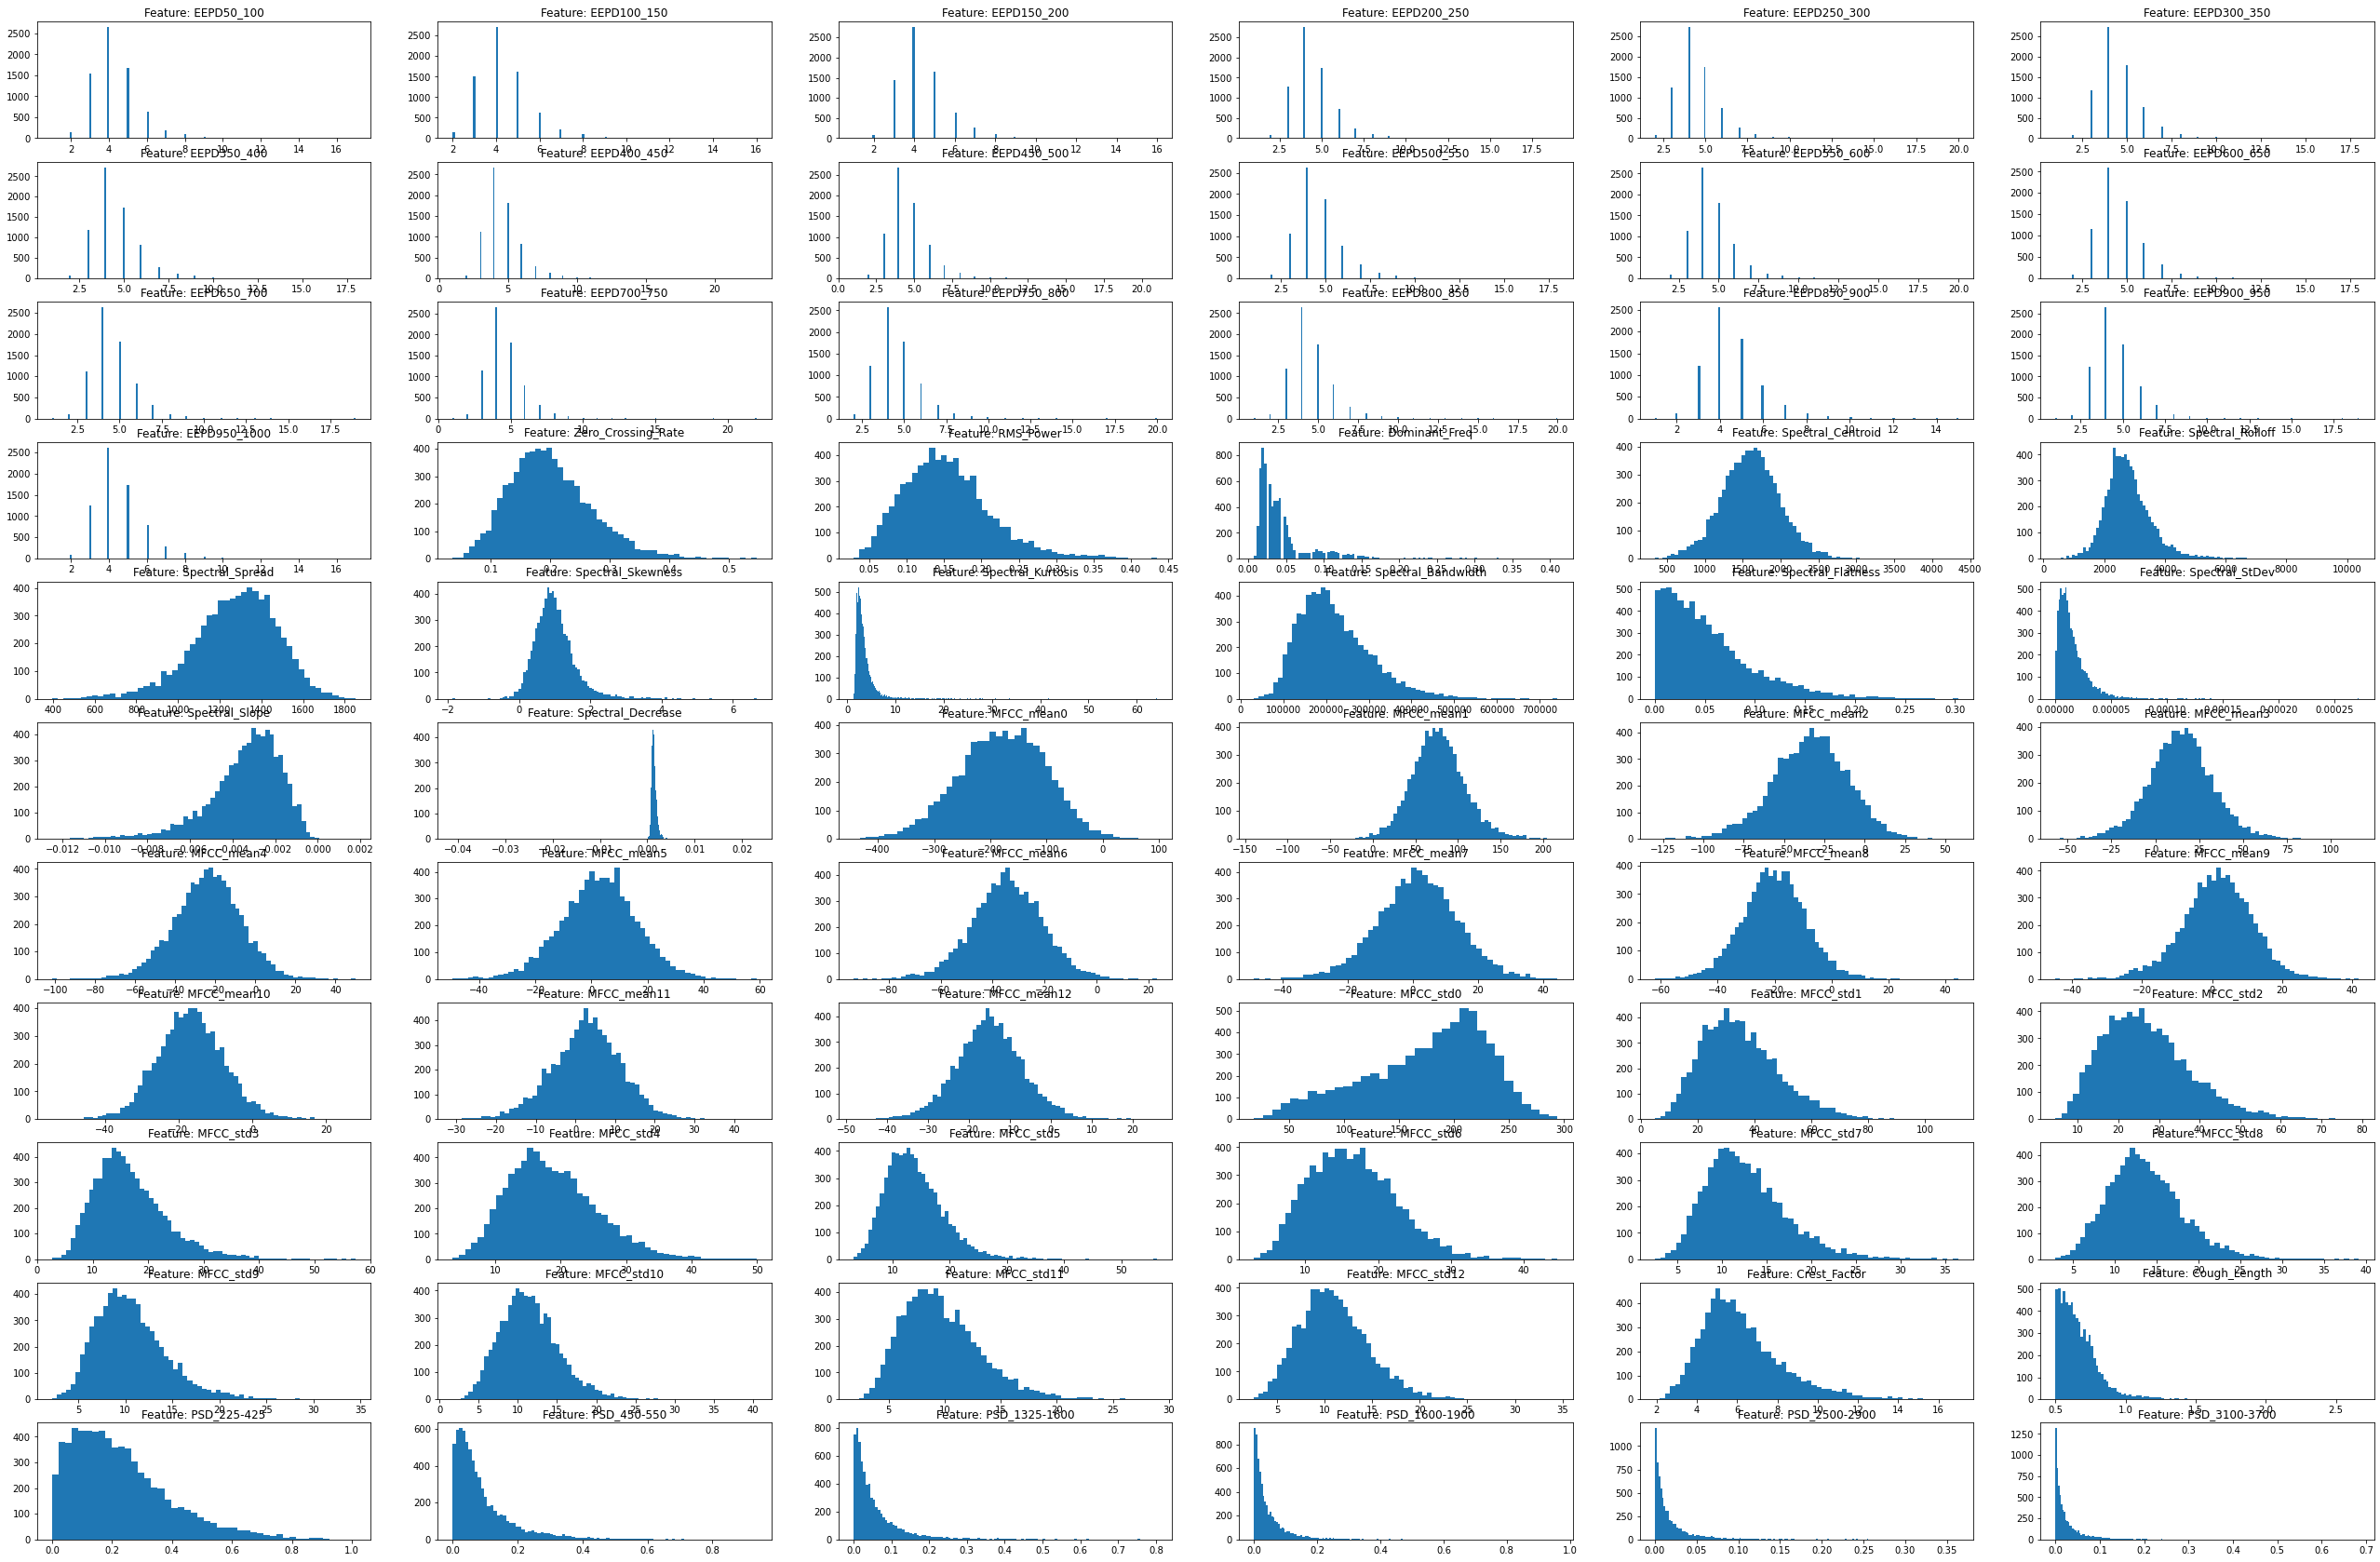

In [14]:
# Histogram tX
nrows = 11
ncols = 6
fig, axes = plt.subplots(nrows, ncols, figsize=(8, 6))

feature_names = df.drop("Label", axis=1).columns
feature_id = 0
for row in range(nrows):
    for col in range(ncols):
        feature_tbp = df[feature_names[feature_id]]
        axes[row, col].hist(feature_tbp, bins='auto')
        axes[row, col].set_title('Feature: {}'.format(feature_names[feature_id]))
        feature_id += 1
        
fig.set_size_inches(45, 30)

- Some skewed datasets. 
- Feature: Dominant_Freq seems to have missing or filtered values... 
- The x-scaling on some of these distributions are weird, which might indicate presence of outliers. Should be checked against the description of the dataframe
- Feature: Spectral Bandwidth has values up to 7 million

### Power Transform skewed features

In [15]:
skewed = df.skew()
skewed_features = skewed[(skewed > 2 ) | (skewed < -2)]

In [16]:
df, pt = dtrans.power_transform_skewed_features(df)

C:\Users\chris\anaconda\lib\site-packages\scipy\stats\morestats.py:908: RuntimeWarning: divide by zero encountered in log
  return (lmb - 1) * np.sum(logdata, axis=0) - N/2 * np.log(variance)


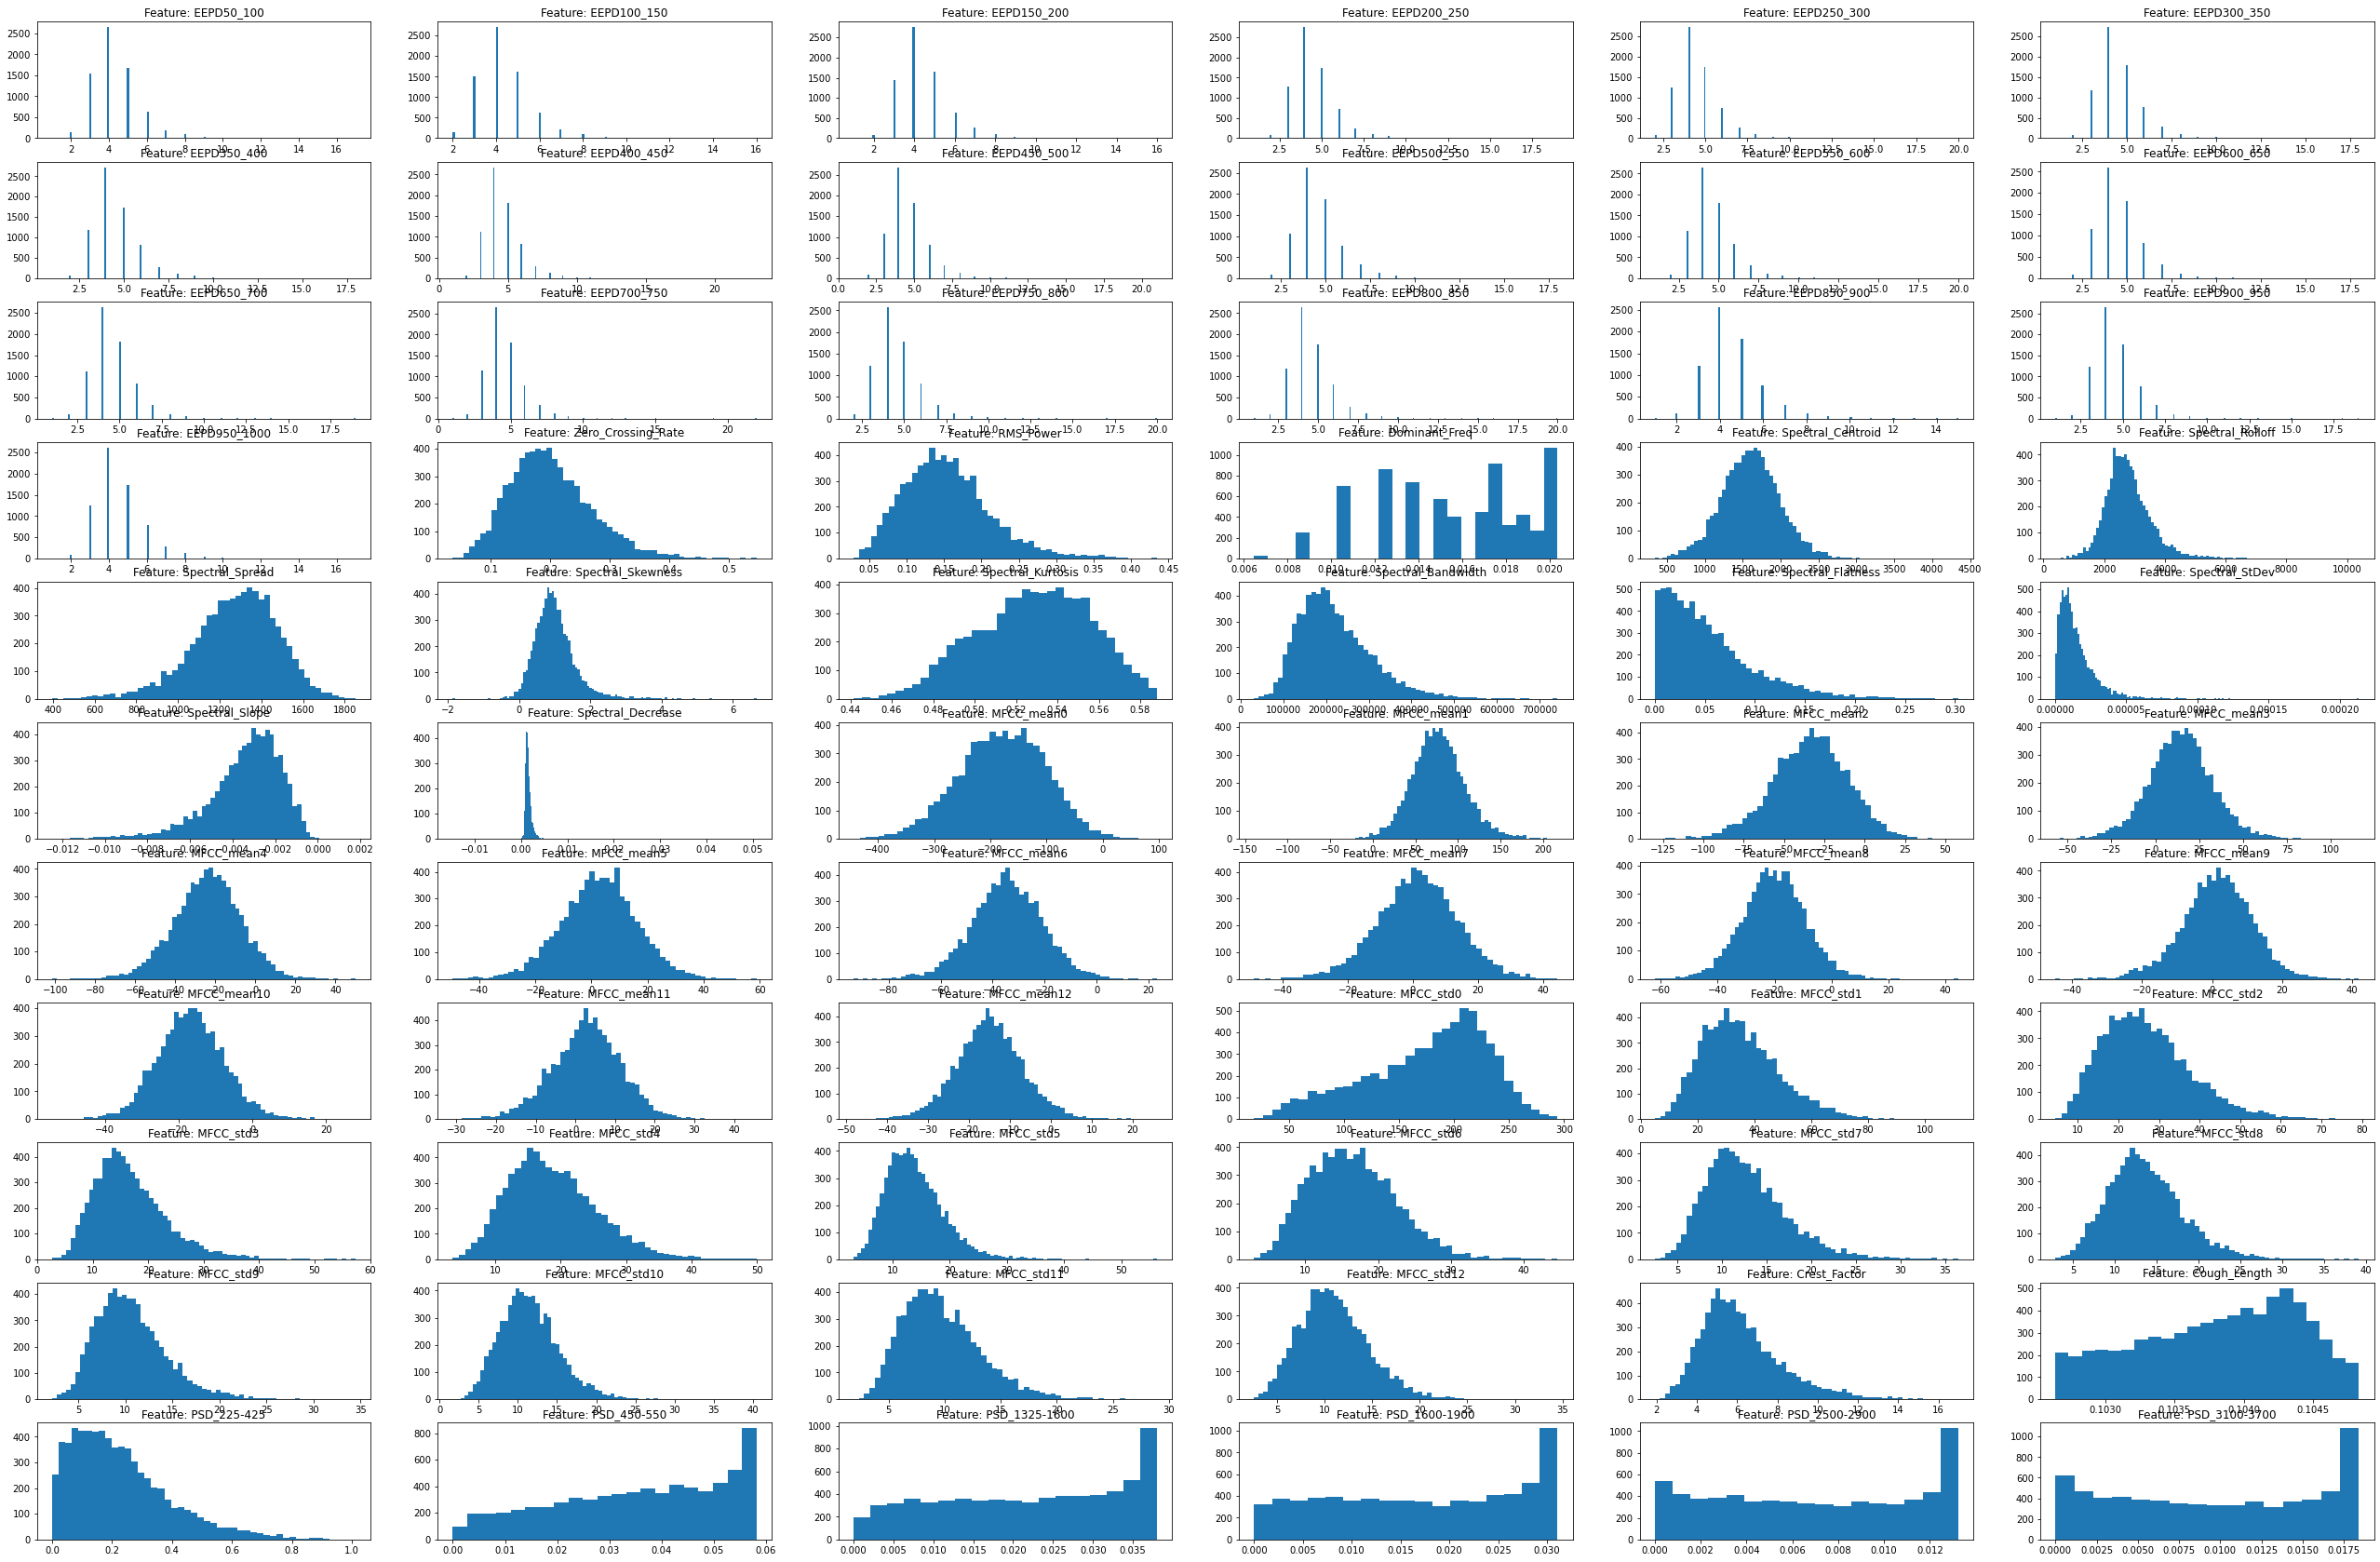

In [17]:
# Histogram tX
nrows = 11
ncols = 6
fig, axes = plt.subplots(nrows, ncols)

feature_names = df.drop("Label", axis=1).columns
feature_id = 0
for row in range(nrows):
    for col in range(ncols):
        feature_tbp = df[feature_names[feature_id]]
        axes[row, col].hist(feature_tbp, bins='auto')
        axes[row, col].set_title('Feature: {}'.format(feature_names[feature_id]))
        feature_id += 1

fig.set_size_inches(45, 30)

### Feature Correlation

In [22]:
## Import different metadata
df = ih.read_and_merge_data(exclude_meta_data=False)
df = ih.index_df_by_person(df)

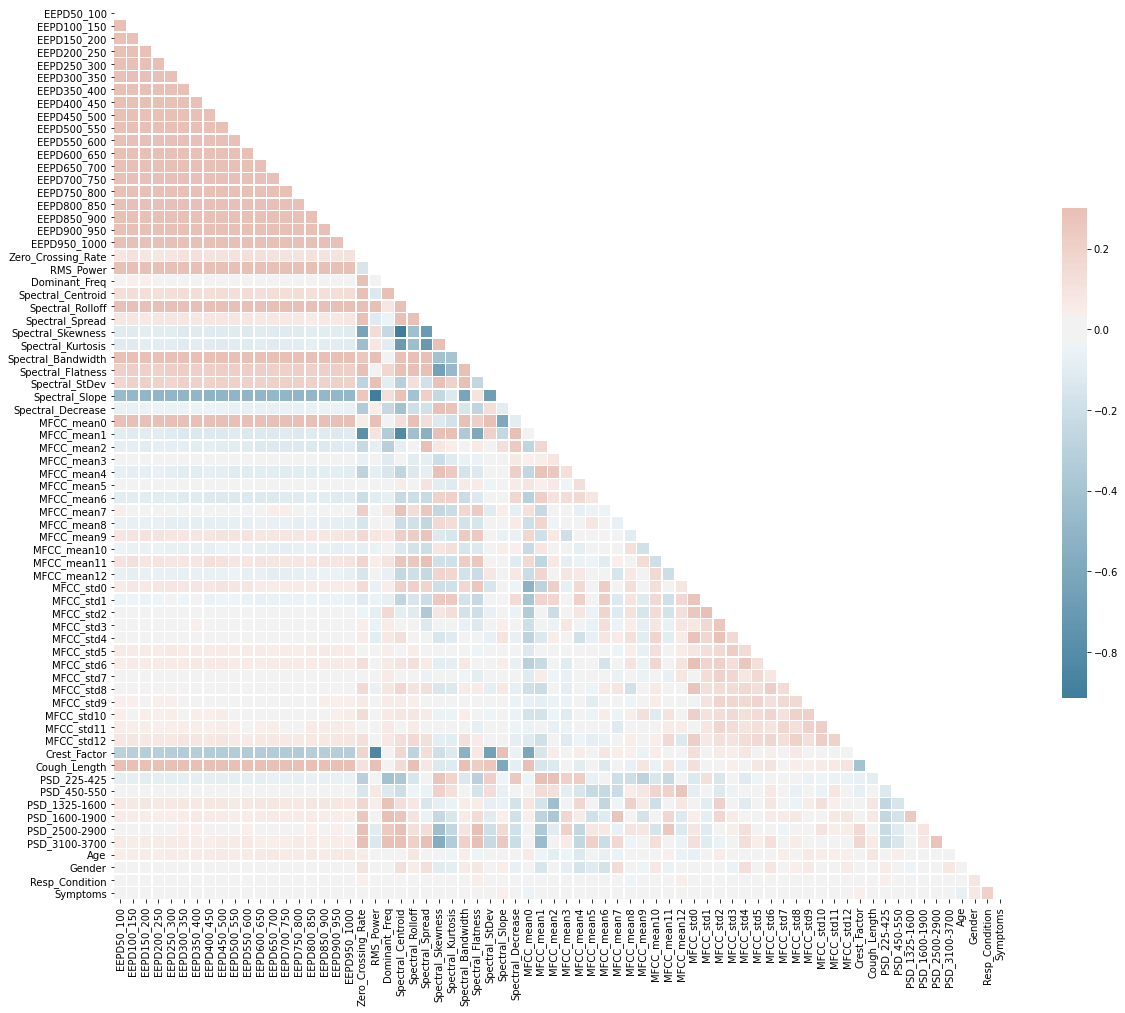

In [23]:
#Compute the correlation matrix
corr = df.drop('Label', axis=1).corr()

#Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

#Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

#Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})